# Online News Popularity Dataset

<h3>I would like to look at data from an online news site to determine how different aspects of each news article affect its popularity, expressed by number of shares.</h3>
<h4>https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity </h4>

This set of data provided by UCI's Machine Learning Repository describes a number of news articles posted on Mashable.com before January 8, 2015. With 39644 data entries and 61 descirptive attributes, there is plenty to compare. The attribute types vary, relating to content, length, keywords, when the article was posted, and sentiment. I am especially interested in how sentiment in the text compares to the number of shares. Of course I cannot consider the setiment data and shares together as if they were in a vacuum, so I will first determine if there are trends created within the other attributes before comparing sentiment with the number of shares by genre. I think ultimately I will in fact find what helps make a news posting more shareable overall.

I suspect that the use of multiple image and video media will strongly influence the interest, but not more than the genre or sentiment of the article. I will show the time since post and length of the article as well, but I do not predict these attributes will influence the interest much at all, in comparison. In this case, data was collected on shares but not on other atributes such as number of likes or amount of time a person stayed on the page, for instance. So when I refer to the interest of a page, it can be used interchangably with shares in this case.

<i>Our initial questions are:
1. Does the length of time since the post was made to the point of data collection (timedelta) significantly affect the number of shares in this data set? What about the length of the article? The number of images? Or the number of videos?
2. What average of each genre of article (Lifestyle, Entertainment, Business, Social Media, Tech, World) gets shared? Do we see the same trends from question 1 distriubted in the same way across all six genres?
3. Do the levels of positive and negative sentiment for each article relate affect how many shares there are in each genre?

</i>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import iqr
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import hist, show, xticks

 Let's clean up the data a little first. Import the .csv file and strip column names of whitespace.

In [2]:
original = pd.read_csv('online_news_popularity.csv')
news = original.rename(columns=lambda x: x.strip())

In [3]:
pd.set_option('display.max_colwidth', -1)
#This code shows the full column widths so the urls are not truncated.

In [4]:
list(news)

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

Let's see some of the max data.

In [5]:
#The index, count, url and data types of the max number of shares
max_shares = max(news['shares'])

print((news['shares'][news['shares'] == max_shares]),
#original shares at original shares equal to the max value of original shares!
(news['url'][news['shares'] == max_shares]))

9365    843300
Name: shares, dtype: int64 9365    http://mashable.com/2013/07/03/low-cost-iphone/
Name: url, dtype: object


In [6]:
#List top 8 urls
s_news = news.sort_values(by=['shares'], ascending=False)

print(s_news['shares'].head(8), s_news['url'].head(8))

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
16009    441000
18788    310800
4506     306100
Name: shares, dtype: int64 9365     http://mashable.com/2013/07/03/low-cost-iphone/                    
5370     http://mashable.com/2013/04/15/dove-ad-beauty-sketches/            
23237    http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/
16268    http://mashable.com/2013/11/18/kanye-west-harvard-lecture/         
3145     http://mashable.com/2013/03/02/wealth-inequality/                  
16009    http://mashable.com/2013/11/12/roomba-880-review/                  
18788    http://mashable.com/2014/01/14/australia-heatwave-photos/          
4506     http://mashable.com/2013/03/28/blackberry-1-million/               
Name: url, dtype: object


In [7]:
#There does not seem to be a rhyme or reason to the top 8 urls at first glance.

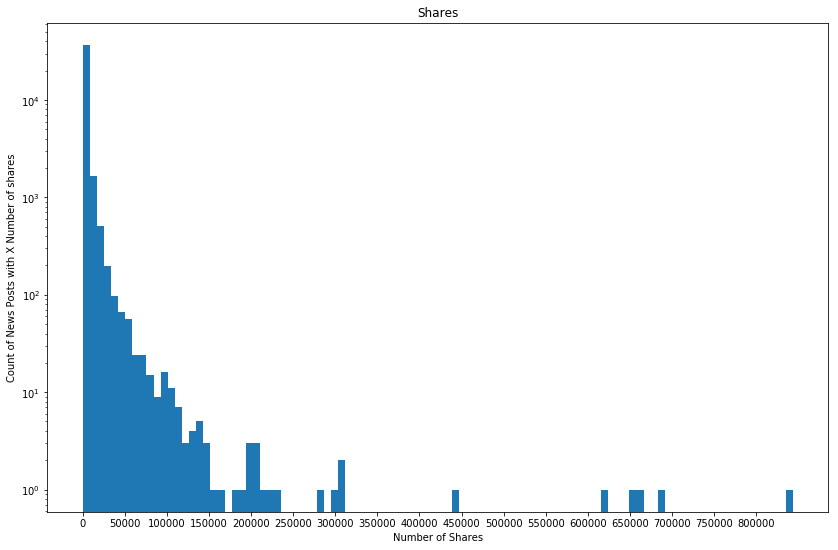

In [8]:
plt.figure(figsize=(14,9))

plt.hist(
    x=(news['shares']),
    bins=100,
    log=True

) 

plt.title('Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Count of News Posts with X Number of shares')
xticks(range(0, 843300, 50000))

plt.show()

Here we see it was difficult to breach ~150,000 to 200,000 for number of shares. The articles overwhelmingly stay relatively low on the list, with few outliers. Looking at just one aspect of going viral, counting the number of shares, even the Number of Shares above 800,000 would not be considered to be a viral article or video. However, that doesn't mean it has no value. Let's take a look at the data to determine what to pursue in terms of best practices for more shares.

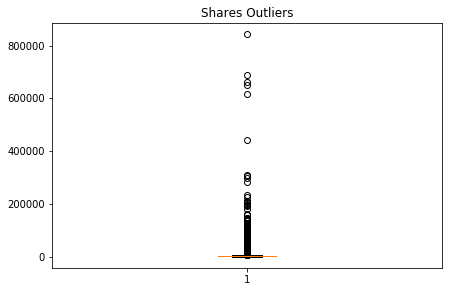

In [9]:
plt.figure(figsize=(7,4.5))

plt.boxplot(news['shares'])

plt.title('Shares Outliers')

plt.show()

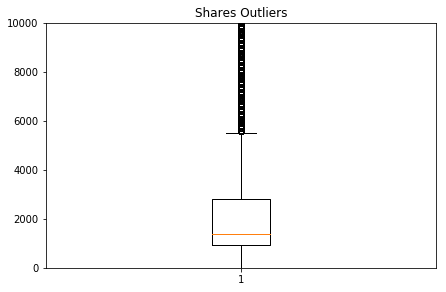

In [15]:
plt.figure(figsize=(7,4.5))

plt.boxplot(news['shares'])

plt.title('Shares Outliers')

plt.ylim(0, 10000)


plt.show()

In [16]:
#(1)The index, timedelta, url and data types of the max timedelta
#(timedelta = Days between the article publication and the dataset acquisition (non-predictive))
#This matches the dataset in the indexes because it appears to be sorted by timedelta
td_count = 0
td_max = max(news['timedelta'])

for x in news['timedelta']:
    if news['timedelta'][x] == td_max:
         td_count += 1
print('There are ' + str(td_count) + ' data entries with the max \'timedelta\' of ' + str(td_max))

print((news['timedelta'][news['timedelta'] == td_max]).head(15),
      (news['url'][news['timedelta'] == td_max]).head(15))

There are 4479 data entries with the max 'timedelta' of 731.0
0     731.0
1     731.0
2     731.0
3     731.0
4     731.0
5     731.0
6     731.0
7     731.0
8     731.0
9     731.0
10    731.0
11    731.0
12    731.0
13    731.0
14    731.0
Name: timedelta, dtype: float64 0     http://mashable.com/2013/01/07/amazon-instant-video-browser/  
1     http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/   
2     http://mashable.com/2013/01/07/apple-40-billion-app-downloads/
3     http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/      
4     http://mashable.com/2013/01/07/att-u-verse-apps/              
5     http://mashable.com/2013/01/07/beewi-smart-toys/              
6     http://mashable.com/2013/01/07/bodymedia-armbandgets-update/  
7     http://mashable.com/2013/01/07/canon-poweshot-n/              
8     http://mashable.com/2013/01/07/car-of-the-future-infographic/ 
9     http://mashable.com/2013/01/07/chuck-hagel-website/           
10    http://mashable.com/2013/01/07

In [17]:
#(2)The index, word count, url and data types of the max word count
print((news['n_tokens_content'][news['n_tokens_content'] == max(news['n_tokens_content'])]),
      (news['url'][news['n_tokens_content'] == max(news['n_tokens_content'])]))

24612    8474.0
Name: n_tokens_content, dtype: float64 24612    http://mashable.com/2014/05/03/joe-biden-commencement/
Name: url, dtype: object


In [18]:
#(3)The index, count, url and data types of the max number of images
print((news['num_imgs'][news['num_imgs'] == max(news['num_imgs'])]),
      (news['url'][news['num_imgs'] == max(news['num_imgs'])]))

18702    128.0
Name: num_imgs, dtype: float64 18702    http://mashable.com/2014/01/12/first-photobomb-comic/
Name: url, dtype: object


In [19]:
#(4)The index, count, url and data types of the max number of videos
print((news['num_videos'][news['num_videos'] == max(news['num_videos'])]),
      (news['url'][news['num_videos'] == max(news['num_videos'])]))

18101    91.0
Name: num_videos, dtype: float64 18101    http://mashable.com/2013/12/27/twitter-stock-surge/
Name: url, dtype: object


We remove the url column here to better view the numerical data entries.

In [20]:
news = news.drop('url', axis=1)
news.head(15)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,0.136364,0.6,-0.195000,-0.4000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,...,0.100000,1.0,-0.224479,-0.5000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,...,0.100000,1.0,-0.242778,-0.5000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.1250,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.5000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [21]:
print('shares min: ' + str(min(news['shares'])), 'shares max: ' + str(max(news['shares'])))

shares min: 1 shares max: 843300


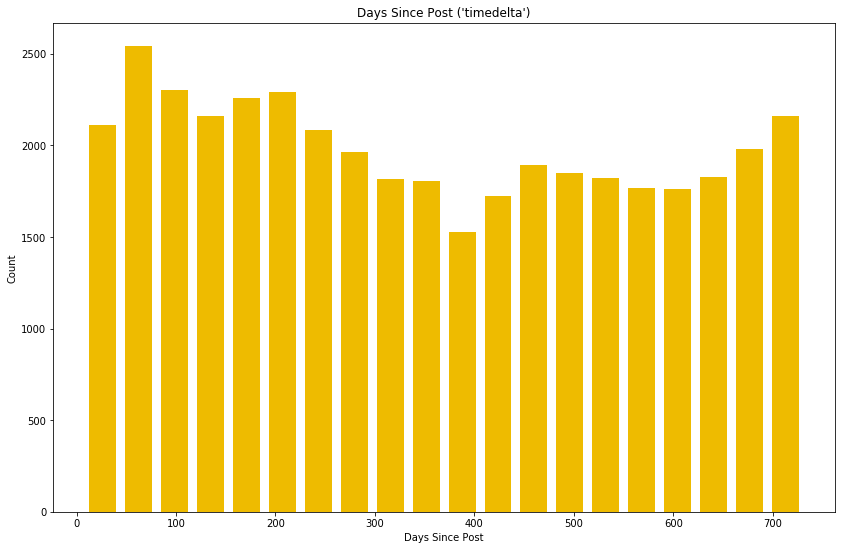

In [22]:
#(1)
plt.figure(figsize=(14,9))

plt.hist(
    x=(news['timedelta']),
    bins=20,
    log=False,
    color='#eebb00',
    rwidth=0.75

) 

plt.title('Days Since Post (\'timedelta\')')
plt.xlabel('Days Since Post')
plt.ylabel('Count')

plt.show()

In [23]:
#sorting shares from highest count to lowest count
news['shares'] == max(news['shares'])
filtered_timedelta = news[news['shares'] == max(news['shares'])]
sorted_news = news.sort_values(by=['shares'], ascending=False)
print(sorted_news['shares'])

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
16009    441000
18788    310800
4506     306100
16113    298400
35256    284700
14757    233400
3043     227300
37590    211600
9853     210300
18488    208300
17020    205600
37873    200100
18037    197600
9575     196700
18055    193400
17267    180600
36995    161600
16989    158900
23585    145500
25008    144900
3139     144400
12072    143100
23514    141400
16642    139600
18850    139500
          ...  
36421    54    
37828    53    
38730    52    
9369     51    
38890    50    
32900    50    
31780    49    
32443    49    
10368    49    
9671     48    
33365    48    
8245     47    
9307     45    
30295    44    
36416    43    
27070    43    
10378    42    
38570    42    
7958     41    
35193    36    
28694    35    
35327    28    
34453    28    
9707     23    
34398    22    
18957    22    
9771     8     
38633    5     
4709     4     
17266    1     
Name: shares, Length: 39

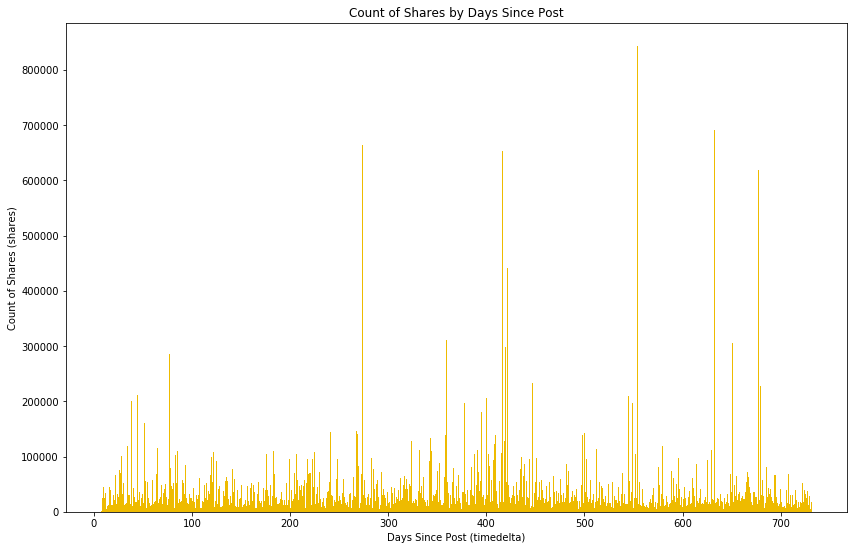

In [24]:
plt.figure(figsize=(14,9))

plt.bar(
    x=np.array(news['timedelta']),
    height=np.array(news['shares']),
    color='#eebb00',
    width=1,
    alpha=1
) 


plt.title('Count of Shares by Days Since Post')
plt.xlabel('Days Since Post (timedelta)')
plt.ylabel('Count of Shares (shares)')

# plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)

plt.show()


We can see there are some outliers that are affecting how we view the information, so let's truncate the count of max shares to a max of 300,000. We will remove the top 8 results.

In [25]:
trunc_shares = sorted_news[8:]

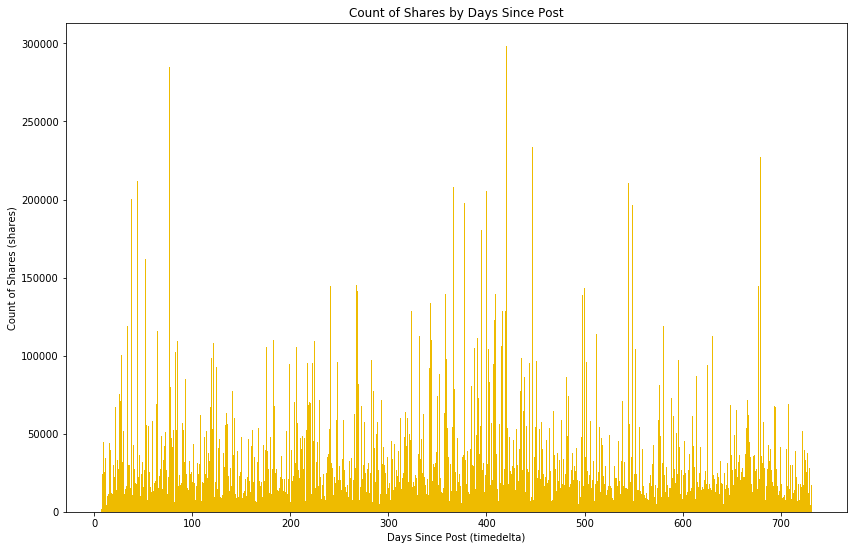

In [26]:
plt.figure(figsize=(14,9))

plt.bar(
    x=np.array(trunc_shares['timedelta']),
    height=np.array(trunc_shares['shares']),
    color='#eebb00',
    width=1,
    alpha=1
) 

plt.title('Count of Shares by Days Since Post')
plt.xlabel('Days Since Post (timedelta)')
plt.ylabel('Count of Shares (shares)')

plt.show()

Let's remove everything outside the IQR for Shares.

In [27]:
shares_mean = np.mean(news['shares'])
q75, q25 = np.percentile(news['shares'], [75 ,25])
iqr = q75 - q25
iqr = iqr*1.5
outlier_limit = shares_mean + iqr
outlier_below = shares_mean - iqr
outlier_count = 0

for x in news['shares']:
    if x < outlier_below or x > outlier_limit:
        outlier_count +=1
print('outliers: ' + str(outlier_count), '\n'
      'percentage of data points that are outliers: ' + str(outlier_count/len(news) * 100)
     )

print('Outlier limit: ' + str(outlier_limit), '\n'
      'Outlier below: ' + str(outlier_below), '\n'
      'Outlier count: ' + str(outlier_count), '\n'
      'Shares mean: ' + str(shares_mean))

outliers: 6422 
percentage of data points that are outliers: 16.199172636464535
Outlier limit: 6176.3801836343455 
Outlier below: 614.3801836343455 
Outlier count: 6422 
Shares mean: 3395.3801836343455


Let's cut out those outliers from our data, just to see the visualization better.

In [28]:
trunc_shares2 = np.where(np.logical_and(sorted_news['shares'] >= outlier_below, sorted_news['shares'] <= outlier_limit))
print(trunc_shares2)
# this shows us the indices of the 25th and 75th percentiles for 'shares', giving us the IQR range

(array([ 4029,  4030,  4031, ..., 37248, 37249, 37250], dtype=int64),)


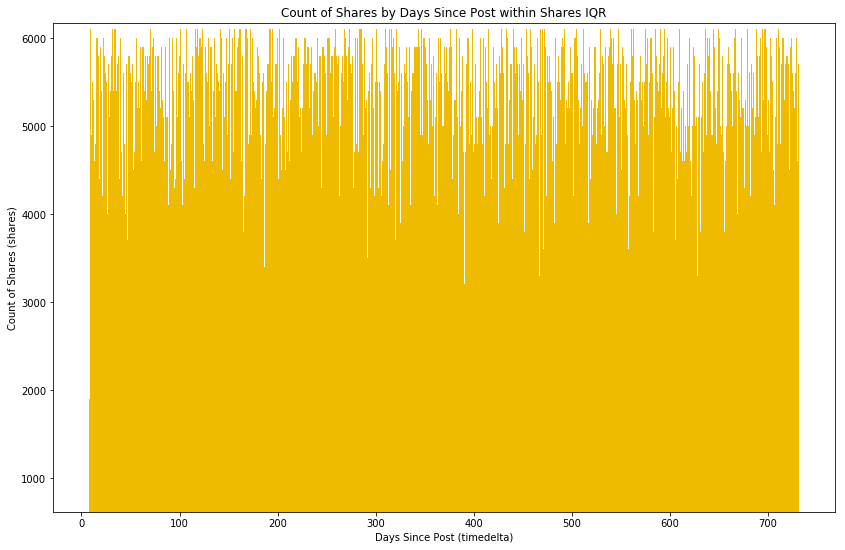

In [29]:
plt.figure(figsize=(14,9))

plt.bar(
    x=np.array(sorted_news['timedelta'][4029:37250]),
    height=np.array(sorted_news['shares'][4029:37250]),
    color='#eebb00',
    width=1,
    alpha=1
) 

plt.title('Count of Shares by Days Since Post within Shares IQR')
plt.xlabel('Days Since Post (timedelta)')
plt.ylabel('Count of Shares (shares)')
plt.ylim((outlier_below, outlier_limit))

plt.show()

Now that we have sampled the IQR to remove the Shares outliers, we can see the data a little more clearly. Setting the y axis limits to match the IQR limits also gives us more "zoomed" detail on the graph. From this graph we can deduce:
-  There is no clear pattern indicated by the timedelta in relation to shares
-  The length of time any given article has been posted does not affect the number of shares in a significant way

Let's check out the gap between timedelta 0 and ~20 to see whats going on there.

In [30]:
print('Lowest number of days since post: ' + str(min(news['timedelta'])))

Lowest number of days since post: 8.0


I expected the timedelta would not significantly affect the shares here. There are no timedeltas shorter than 8 days, accounting for the gap in the visualizations; with modern tech and connectivity, if an article or video is posted, it is normally expected to get most of its shares within the first 24 hours of posting. However, we don't have data that granular from this set, so it's not something we an check! Let's see if the length of the article correlates with shares at all. We can use the same IQR for Count of Shares.

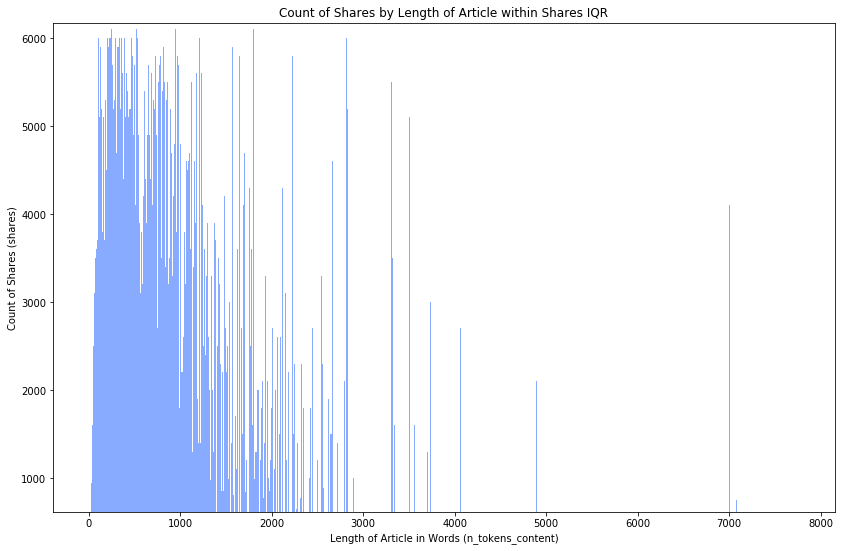

In [31]:
plt.figure(figsize=(14,9))

plt.bar(
    x=np.array(sorted_news['n_tokens_content'][4029:37250]),
    height=np.array(sorted_news['shares'][4029:37250]),
    color='#88aaff',
    width=1,
    alpha=1
) 

plt.title('Count of Shares by Length of Article within Shares IQR')
plt.xlabel('Length of Article in Words (n_tokens_content)')
plt.ylabel('Count of Shares (shares)')
plt.ylim((outlier_below, outlier_limit))

plt.show()

Here we find out a few things:
-  Shares have an initial steep climb to about 200 words
-  There is also a rapid decline after a peak in word count at 200 words, down to practically nothing by length 3,000.
-  It appears word count may affect shares, or at the very least indicates that there is some other attribute of the articles which has a format including few words, but generally has many shares.

Could that format include images or video? Perhaps it has to do with the genre of the article as well.

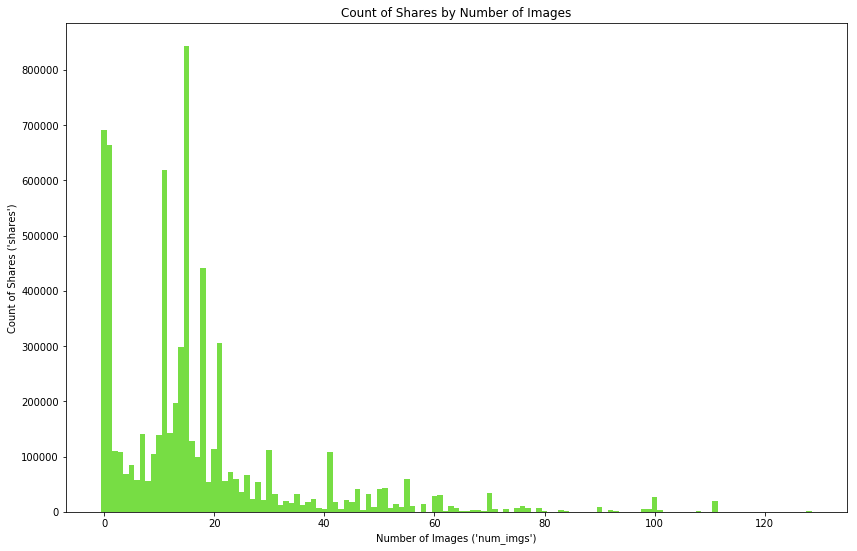

In [32]:
plt.figure(figsize=(14, 9)) 

plt.bar(
    x=np.array(news['num_imgs']),
    height=np.array(news['shares']),
    color='#77dd44',
    width=1,
    alpha=1
) 

plt.title('Count of Shares by Number of Images')
plt.xlabel('Number of Images (\'num_imgs\')')
plt.ylabel('Count of Shares (\'shares\')')

plt.show()

In [33]:
print('num_imgs min: ' + str(min(news['num_imgs'])), 'num_imgs max: ' + str(max(news['num_imgs'])))

num_imgs min: 0.0 num_imgs max: 128.0


How many articles are there with x number of images?

In [34]:
print(news['num_imgs'].value_counts().head(10))

1.0     18119
0.0     6987 
2.0     2965 
3.0     1223 
11.0    1125 
10.0    860  
4.0     668  
12.0    601  
6.0     571  
9.0     546  
Name: num_imgs, dtype: int64


What is the average number of shares for articles with 0 images, 1 image, 2 images, 3 images, 11 images...

In [35]:
shares_count_0 = 0

for entry in news['num_imgs']:
    if entry == 0:
        shares_count_0 = shares_count_0 + news['shares'][entry]

print('Shares total for all articles with 0 images: ' + str(shares_count_0))
print('Average number of shares for articles with 0 images: ' + str(shares_count_0/(sum(news['num_imgs'] == 0))))

Shares total for all articles with 0 images: 4143291
Average number of shares for articles with 0 images: 593.0


In [36]:
shares_count_1 = 0

for entry in news['num_imgs']:
    if entry == 1:
        shares_count_1 = shares_count_1 + news['shares'][entry]

print('Shares total for all articles with 1 image: ' + str(shares_count_1))
print('Average number of shares for articles with 1 image: ' + str(shares_count_1/(sum(news['num_imgs'] == 1))))

Shares total for all articles with 1 image: 12882609
Average number of shares for articles with 1 image: 711.0


In [37]:
shares_count_2 = 0

for entry in news['num_imgs']:
    if entry == 2:
        shares_count_2 = shares_count_2 + news['shares'][entry]

print('Shares total for all articles with 2 images: ' + str(shares_count_2))
print('Average number of shares for articles with 2 images: ' + str(shares_count_2/(sum(news['num_imgs'] == 1))))

Shares total for all articles with 2 images: 4447500
Average number of shares for articles with 2 images: 245.46056625641592


In [38]:
shares_count_3 = 0

for entry in news['num_imgs']:
    if entry == 3:
        shares_count_3 = shares_count_3 + news['shares'][entry]

print('Shares total for all articles with 3 images: ' + str(shares_count_3))
print('Average number of shares for articles with 3 images: ' + str(shares_count_3/(sum(news['num_imgs'] == 3))))

Shares total for all articles with 3 images: 1467600
Average number of shares for articles with 3 images: 1200.0


In [39]:
shares_count_11 = 0

for entry in news['num_imgs']:
    if entry == 11:
        shares_count_11 = shares_count_11 + news['shares'][entry]

print('Shares total for all articles with 11 images: ' + str(shares_count_11))
print('Average number of shares for articles with 11 images: ' + str(shares_count_11/(sum(news['num_imgs'] == 11))))

Shares total for all articles with 11 images: 2137500
Average number of shares for articles with 11 images: 1900.0


In [40]:
shares_count_10 = 0

for entry in news['num_imgs']:
    if entry == 10:
        shares_count_10 = shares_count_10 + news['shares'][entry]

print('Shares total for all articles with 10 images: ' + str(shares_count_10))
print('Average number of shares for articles with 10 images: ' + str(shares_count_10/(sum(news['num_imgs'] == 10))))

Shares total for all articles with 10 images: 1892000
Average number of shares for articles with 10 images: 2200.0


In [41]:
shares_count_4 = 0

for entry in news['num_imgs']:
    if entry == 4:
        shares_count_4 = shares_count_4 + news['shares'][entry]

print('Shares total for all articles with 4 images: ' + str(shares_count_4))
print('Average number of shares for articles with 4 images: ' + str(shares_count_4/(sum(news['num_imgs'] == 4))))

Shares total for all articles with 4 images: 337340
Average number of shares for articles with 4 images: 505.0


In [42]:
shares_count_12 = 0

for entry in news['num_imgs']:
    if entry == 12:
        shares_count_12 = shares_count_12 + news['shares'][entry]

print('Shares total for all articles with 12 images: ' + str(shares_count_12))
print('Average number of shares for articles with 12 images: ' + str(shares_count_12/(sum(news['num_imgs'] == 12))))

Shares total for all articles with 12 images: 494623
Average number of shares for articles with 12 images: 823.0


In [43]:
shares_count_6 = 0

for entry in news['num_imgs']:
    if entry == 6:
        shares_count_6 = shares_count_6 + news['shares'][entry]

print('Shares total for all articles with 6 images: ' + str(shares_count_6))
print('Average number of shares for articles with 6 images: ' + str(shares_count_6/(sum(news['num_imgs'] == 6))))

Shares total for all articles with 6 images: 317476
Average number of shares for articles with 6 images: 556.0


In [44]:
shares_count_9 = 0

for entry in news['num_imgs']:
    if entry == 9:
        shares_count_9 = shares_count_9 + news['shares'][entry]

print('Shares total for all articles with 9 images: ' + str(shares_count_9))
print('Average number of shares for articles with 9 images: ' + str(shares_count_9/(sum(news['num_imgs'] == 9))))

Shares total for all articles with 9 images: 387660
Average number of shares for articles with 9 images: 710.0


We are seeing a different trend here if we look at the average number of shares per article type (type being number of images posted). Let's look at a more detailed graph comparing number of images in the article to number of shares.

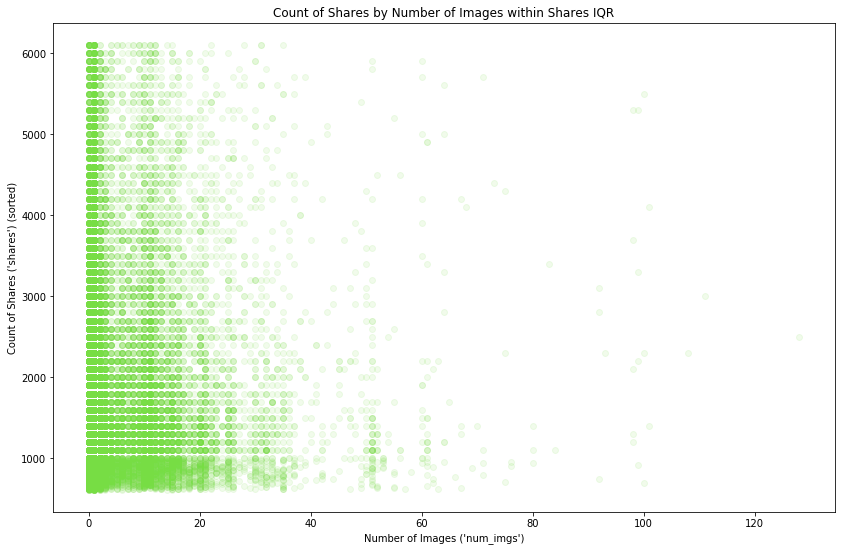

In [45]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Images within Shares IQR')
plt.xlabel('Number of Images (\'num_imgs\')')
plt.ylabel('Count of Shares (\'shares\') (sorted)')
plt.scatter(sorted_news['num_imgs'][4029:37250],sorted_news['shares'][4029:37250], alpha=0.1, color='#77dd44', marker='o')

The scatter plot here shows us more about how the shares are distributed. We can still see the high peaks for each Number of Images, but also a visual of where the Count of Shares is clustering for each. We can see:
- 0 ~ 1 images has pretty even distribution of shares within the IQR
- Since 0 ~ 1 images shares looks fairly solid to the top edge of the IQR, it likely has a lot of outliers above the IQR. (We can see this in a minute)
- We still see there is a significant number of Shares within the 0-20 range of Number of Images, expressing most strongly from 0 Shares to about 2,500 shares. That's not impressive in itself, but it shows us a trend nonetheless.

Let's see the graph at full height up to max Shares:

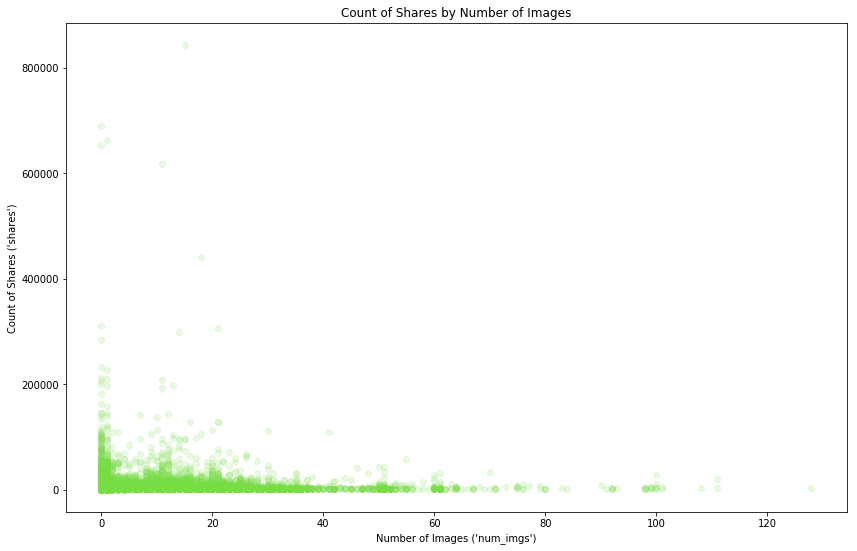

In [46]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Images')
plt.xlabel('Number of Images (\'num_imgs\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.scatter(news['num_imgs'],news['shares'], alpha=0.15, color='#77dd44', marker='o')

We indeed see the outliers of Shares in the very low Number of Images section, with more indications of moderate success with shares in the ~2-20 range to about 100,000 shares on the high end, but with an average peak more around ~50,000.

Overall, we find that:
- Fewer images on an article generally correlates with more shares
- 0 to 1 images is enough!
- 2 to 20 images in the article returns a decent amount of shares as well
- After about 22 images, we don't see any significant spikes in shares

We may conclude from this data that more isn't necessarily better when it comes to including images. It may indicate that the article is too long or relies too heavily on images in presenting information in such a way that the article loses value. Maybe the article is too cluttered or makes the page slow to load for those without the fastest internet speed. Perhaps there are too many ads on the page.

Now let's see the same Shares graphs for the number of videos.

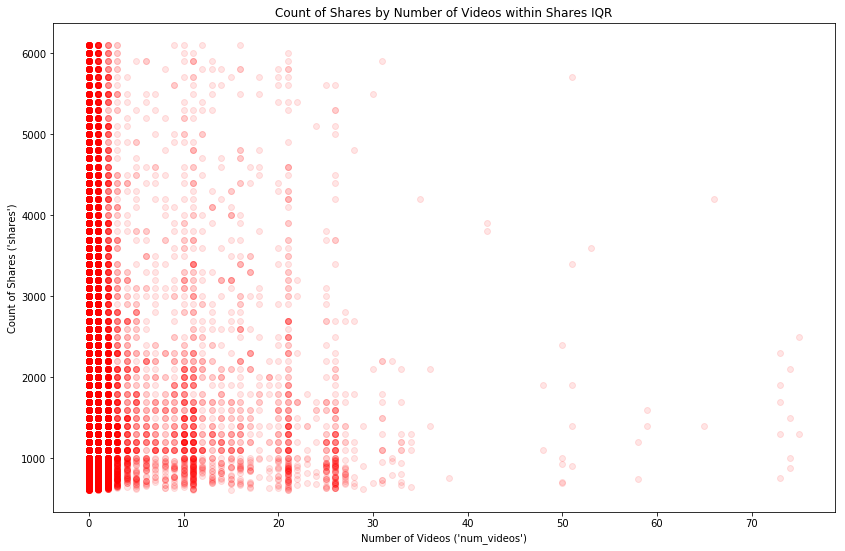

In [47]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Videos within Shares IQR')
plt.xlabel('Number of Videos (\'num_videos\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.scatter(sorted_news['num_videos'][4029:37250],sorted_news['shares'][4029:37250], alpha=0.1, color='#ff0000', marker='o')

This is actually similar to the images scatter plot. Here we can see:
- ~0-3 videos per article seem to have a strong trend upward, still with a lot of variability within each Number of Videos
- The data appears more sparse throughout the rest of the graph compared to the images graph
- There are a few strong indications of upward trend at around 10/11 videos, 21 videos, and 26 videos

Let's take a look at the full height.

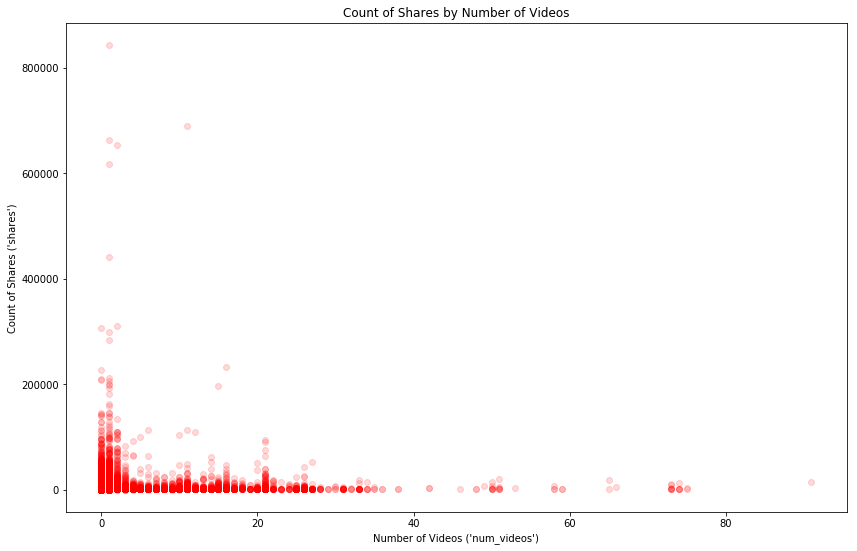

In [48]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Videos')
plt.xlabel('Number of Videos (\'num_videos\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.scatter(news['num_videos'],news['shares'], alpha=0.15, color='#ff0000', marker='o')

I think this graph well represets what anyone could guess about the Number of Videos in relation to Shares. It is clear that articles with 0 to 2 videos is ideal. It maybe that the more videos in an article, the more the viewer is overwhelmed or annoyed or the longer the have to wait to load a page. It is shocking to think that a page would have 10 or more videos, let alone over 80. It would be interesting to review the format and content of those articles, but we won't go down that rabbit hole right now.

Let's take a look at genre percentage within Lifestyle, Entertainment, Business, Social Media, Tech, and World.

In [74]:
lifestyle_count_total = sum(news['data_channel_is_lifestyle'])

print(lifestyle_count_total)
print(news['data_channel_is_lifestyle'].value_counts())
#1 represents that the channel is lifestyle, 0 represents that it is not.

percent_lifestyle = round((lifestyle_count_total/len(news)*100), 2)

print(str(percent_lifestyle) + ' percent of articles are Lifestyle articles')

2099.0
0.0    37545
1.0    2099 
Name: data_channel_is_lifestyle, dtype: int64
5.29 percent of articles are Lifestyle articles


In [75]:
entertainment_count_total = sum(news['data_channel_is_entertainment'])

print(entertainment_count_total)
print(news['data_channel_is_entertainment'].value_counts())

percent_ent = round((entertainment_count_total/len(news)*100), 2)

print(str(percent_ent) + ' percent of articles are Entertainment articles')

7057.0
0.0    32587
1.0    7057 
Name: data_channel_is_entertainment, dtype: int64
17.8 percent of articles are Entertainment articles


In [76]:
business_count_total = sum(news['data_channel_is_bus'])

print(business_count_total)
print(news['data_channel_is_bus'].value_counts())

percent_bus = round((business_count_total/len(news)*100), 2)

print(str(percent_bus) + ' percent of articles are Business articles')

6258.0
0.0    33386
1.0    6258 
Name: data_channel_is_bus, dtype: int64
15.79 percent of articles are Business articles


In [77]:
social_count_total = sum(news['data_channel_is_socmed'])

print(social_count_total)
print(news['data_channel_is_socmed'].value_counts())

percent_social = round((social_count_total/len(news)*100), 2)

print(str(percent_social) + ' percent of articles are Social Media articles')

2323.0
0.0    37321
1.0    2323 
Name: data_channel_is_socmed, dtype: int64
5.86 percent of articles are Social Media articles


In [78]:
tech_count_total = sum(news['data_channel_is_tech'])

print(tech_count_total)
print(news['data_channel_is_tech'].value_counts())

percent_tech = round((tech_count_total/len(news)*100), 2)

print(str(percent_tech) + ' percent of articles are Tech articles')

7346.0
0.0    32298
1.0    7346 
Name: data_channel_is_tech, dtype: int64
18.53 percent of articles are Tech articles


In [80]:
world_count_total = sum(news['data_channel_is_world'])

print(world_count_total)
print(news['data_channel_is_world'].value_counts())

percent_world = round((world_count_total/len(news)*100), 2)

print(str(percent_world) + ' percent of articles are World articles')

8427.0
0.0    31217
1.0    8427 
Name: data_channel_is_world, dtype: int64
21.26 percent of articles are World articles


In [92]:
percent_other =  100 - (percent_lifestyle + percent_ent + percent_bus + percent_social + percent_tech + percent_world)
percent_other = round(percent_other, 2)
print(str(percent_other) + ' percent of articles are Other article genres')

15.47 percent of articles are Other article genres


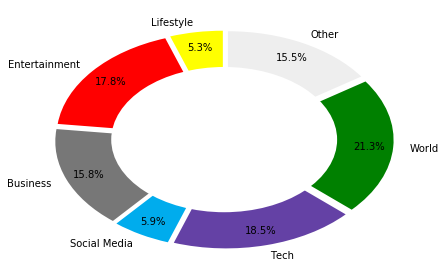

In [99]:
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World', 'Other']
sizes = [percent_lifestyle, percent_ent, percent_bus, percent_social, percent_tech, percent_world, percent_other]
#colors
colors = ['yellow','#ff0000','#777777','#00aced', '#6441a5', 'green', '#eeeeee']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.show()

From what we have gathered thus far, we have provided a more directed approach on how to continue testing for better share results. We know we can throw out the 'timedelta' data from this dataset, as it is not granular enough. The number of words in an article would should be 200 to 1,000 words for the greatest return on shares. Images can enhance an article, but many images are not necessary for a high number of shares. The same goes for videos, 0 to 2 videos is ideal. What we learn from this data overall is that less an often be more! If we continue to look at the data, I think that the genres and sentiment will have more affect, but for now, we can save time by making our articles shorter, with fewer images and videos, and instead put more energy into content.